# Problem Statement
Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

## Understanding:
Business works on reviews, Marketing companies wants to assess and predict the reviews that they have gathered on their products. Also, Based on the review text provided, stakeholders would like to know whether the feedback has a positive or negative sentiment.

This will help guide decision-making for the firm, as they will want to deep dive into products and improve the feedback— thereby boosting the products sale.

### Identify-the-Sentiments
Provided with tweet data to predict sentiment on electronic products of netizens.

**Note :-** Most profane and vulgar terms in the tweets have been replaced with “$&@*#”. However, please note that the dataset still might contain text that may be considered profane, vulgar, or offensive.

### Import Library

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes  import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.notebook_repr_html', True)

### Read Data from train/test files and concat for preprocessing

In [238]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = pd.concat([train, test])
df.head(10)

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...
5,6,1.0,iPhone software update fucked up my phone big ...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...
8,9,0.0,Bout to go shopping again listening to music #...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...


In [239]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [240]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [241]:
print(train.shape, test.shape, df.shape)

(7920, 3) (1953, 2) (9873, 3)


In [242]:
df.describe()

,id,label
count,9873.000000,7920.000000
mean,4937.000000,0.255808
std,2850.233938,0.436342
min,1.000000,0.000000
25%,2469.000000,0.000000
50%,4937.000000,0.000000
75%,7405.000000,1.000000
max,9873.000000,1.000000


In [244]:
df.dtypes

id         int64
label    float64
tweet     object
dtype: object

In [245]:
df.isnull().sum()

id          0
label    1953
tweet       0
dtype: int64

- No missing data

In [246]:
df['label'].value_counts()

0.0    5894
1.0    2026
Name: label, dtype: int64

### EDA

<AxesSubplot:xlabel='label', ylabel='count'>

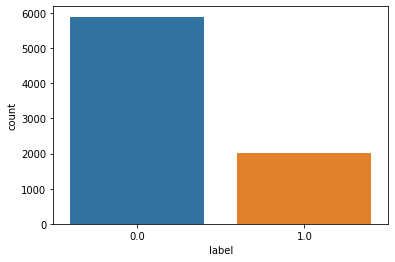

In [247]:
sns.countplot(x='label', data=df)

In [248]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

In [249]:
def preprocess(tweet):
    #     processedText = []
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    badword = '$&@*#'
    
    tweet = tweet.lower()
        
    # Replace all URls with 'URL'
#     tweet = re.sub(urlPattern,' URL',tweet)
    # Replace all emojis.
    for emoji in emojis.keys():
        tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
    # Replace @USERNAME to 'USER'.
    tweet = re.sub(userPattern,' USER', tweet)  
    # Relace '@[^\s]'+ to 'vulgar'
    tweet = re.sub(badword,'worst', tweet)
    # Replace all non alphabets.
    tweet = re.sub(alphaPattern, " ", tweet)
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    tweetwords = ''
    
    for word in tweet.split():
        # Checking if the word is a stopword.
        #if word not in stopwordlist:
        if len(word)>1:
                # Lemmatizing the word.
            word = wordLemm.lemmatize(word)
            tweetwords += (word+' ')
            
    return tweetwords
df['processed_tweet'] = df.tweet.apply(lambda x : preprocess(x))

### WordCloud of Positive sample in training data

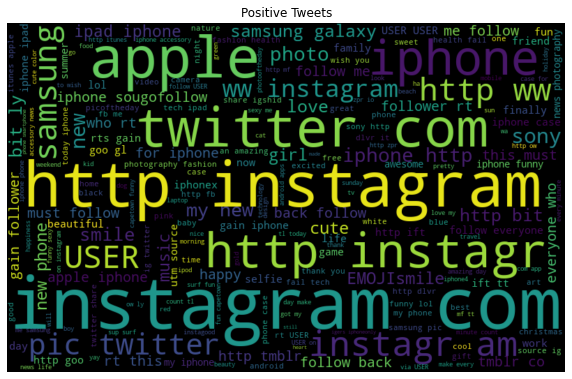

In [250]:
positive= df[df['label']==0]
all_words = ' '.join([text for text in positive['processed_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=40, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Positive Tweets')
plt.axis('off')
plt.show()

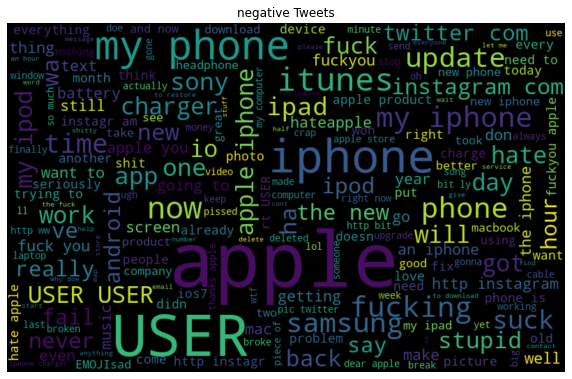

In [252]:
positive= df[df['label']==1]
all_words = ' '.join([text for text in positive['processed_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=40, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('negative Tweets')
plt.axis('off')
plt.show()

In [199]:
# Remove unnecessary
ndf=df.copy()
ndf = ndf.drop(['tweet'], axis =1 )

In [200]:
ndf.head()

,id,label,processed_tweet
0,1,0.0,fingerprint pregnancy test URL android apps be...
1,2,0.0,finally transparant silicon case thanks to my ...
2,3,0.0,we love this would you go talk makememories un...
3,4,0.0,wired know george wa made that way EMOJIwink i...
4,5,1.0,what amazing service apple won even talk to me...


### Model

In [201]:
# Seperating Train and Test Set
train_set = ndf[~ndf.label.isnull()]
test_set = ndf[ndf.label.isnull()]

In [202]:
# Shape
print(train_set.shape,test_set.shape)

(7920, 3) (1953, 3)


In [203]:
# Defining X and Y
X = train_set.drop(['label'], axis=1)
y = train_set.label
# Droping target columns
test_set = test_set.drop(['label'], axis=1)

In [204]:
X.drop(['id'], inplace = True, axis = 1)
X=X['processed_tweet'].astype(str)

In [205]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

To perform further analysis we need to transform our data into a format that can be processed by our machine learning models.

- **CountVectorizer** does text preprocessing, tokenizing and filtering of stopwords and it builds a dictionary of features and transform documents to feature vectors.
- **TfidfTransformer** transforms the above vector by dividing the number of occurrences of each word in a document by the total number of words in the document. These new features are called tf for Term Frequencies.

In [206]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5544,) (2376,) (5544,) (2376,)


In [207]:
from sklearn.feature_extraction.text import TfidfTransformer

vect = CountVectorizer(max_df=0.9, min_df=0.02)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

### Random Forest

In [208]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_dtm,y_train)
rf = model.predict(X_test_dtm)
print("Accuracy:",accuracy_score(y_test,rf)*100,"%")
print(f1_score(y_test, rf))

Accuracy: 87.54208754208754 %
0.7740458015267175


In [209]:
data = test_set['processed_tweet'].astype(str)
res = model.predict(vect.transform(data))
submission = pd.DataFrame({'id': test_set['id'], 'label': res})
submission.to_csv('sample_submission.csv', index = False)

In [210]:
def run_model(df, target, vectorizer, model):
    X = df
    y = target
    vect = vectorizer
    
    # splitting data into training and validation set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.3)
    
    # Vectorize
    vector = vect.fit(X_train)
    X_train_vect = vector.transform(X_train).toarray()
    X_valid_vect = vector.transform(X_valid).toarray()
    
    # Fit and predict
    model.fit(X_train_vect, y_train)  
    y_pred = model.predict(X_valid_vect)  
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average='weighted')
    print('F1_score: ',F1_score) 
    print('Accuracy:', accuracy_score(y_valid, y_pred))
    return F1_score, y_pred, model, vector

In [211]:
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
models = [MultinomialNB, GaussianNB,LogisticRegression,DecisionTreeClassifier, RandomForestClassifier]
vectorizers = [TfidfVectorizer, CountVectorizer]
for vectorizer in vectorizers:
  vectorizer = vectorizer(max_df=0.9, min_df=0.02)
  for model in models:
      # run model
      model = model()
      F1_score, y_pred, model, vector = run_model(X, y, vectorizer = vectorizer, model = model) 
      print('On Model - '+str(model),'\nwith Vectorizer - '+str(vectorizer))
      print('===='*20)

classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1772
         1.0       0.76      0.70      0.73       604

    accuracy                           0.87      2376
   macro avg       0.83      0.81      0.82      2376
weighted avg       0.87      0.87      0.87      2376

F1_score:  0.8671513534478639
Accuracy: 0.8691077441077442
On Model - MultinomialNB() 
with Vectorizer - TfidfVectorizer(max_df=0.9, min_df=0.02)
classification report: 
               precision    recall  f1-score   support

         0.0       0.97      0.65      0.78      1772
         1.0       0.48      0.95      0.64       604

    accuracy                           0.73      2376
   macro avg       0.73      0.80      0.71      2376
weighted avg       0.85      0.73      0.74      2376

F1_score:  0.7439959132519061
Accuracy: 0.7264309764309764
On Model - GaussianNB() 
with Vectorizer - TfidfVectorizer(max_df=0.9, min_df=0.02)
classif

In [212]:
F1_score, y_pred, model, vector = run_model(X, y, vectorizer=CountVectorizer(max_df=0.9, min_df=0.02), model=MultinomialNB())

classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      1772
         1.0       0.72      0.87      0.79       604

    accuracy                           0.88      2376
   macro avg       0.83      0.88      0.85      2376
weighted avg       0.89      0.88      0.88      2376

F1_score:  0.8827095249162047
Accuracy: 0.8792087542087542


In [213]:
data = test_set['processed_tweet'].astype(str)
res = model.predict(vector.transform(data))
submission = pd.DataFrame({'id': test_set['id'], 'label': res})
submission.to_csv('sample_submission.csv', index = False)

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE


def ensemble(dataframe,target):
    X = dataframe
    y = target
    
    tfidf_vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=1000)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
     
    # TF-IDF feature matrix
    tfidf_vectorizer.fit(X_train)
    X_train_vect = tfidf_vectorizer.transform(X_train).toarray()
    X_valid_vect = tfidf_vectorizer.transform(X_valid).toarray()
    
    
    smote = SMOTE(random_state=0)
    
    X_train_vect_sm, y_train_sm =  smote.fit_sample(X_train_vect, y_train)
    #print("X_train_vect_sm shape after smote: ",X_train_vect_sm.shape)

    
   
    model1 = RandomForestClassifier(random_state=0, n_jobs=-1, 
                                    class_weight="balanced", 
                                    criterion = 'gini',max_depth= 4,
                                    max_features = 'auto', n_estimators = 200
                                    )
    model2 = MultinomialNB()
    model3 = LogisticRegression(class_weight="balanced")
    
    model = VotingClassifier(estimators=[('rf', model1),('nb', model2), ('lr', model3)], voting='soft')
    
    model.fit(X_train_vect_sm, y_train_sm)
    y_pred = model.predict(X_valid_vect) 
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average='weighted')
    print('F1_score: ',F1_score) 
    
    return tfidf_vectorizer, model

vec, model = ensemble(X,y)

classification report: 
               precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      1735
         1.0       0.71      0.92      0.80       641

    accuracy                           0.88      2376
   macro avg       0.84      0.89      0.86      2376
weighted avg       0.90      0.88      0.88      2376

F1_score:  0.8814431463251869


In [215]:
data = test_set['processed_tweet'].astype(str)
res = model.predict(vec.transform(data))
submission = pd.DataFrame({'id': test_set['id'], 'label': res})
submission.to_csv('sample_submission.csv', index = False)

In [261]:
def predict_sentiment(sample_review):
    sample_review = preprocess(sample_review)
    temp = model.predict(vec.transform([sample_review]))
    if temp == 0:
        print('Happy customer- with Positive response')
    else:
        print('Negative response')


In [265]:
predict_sentiment('apple #instagram good')

Happy customer- with Positive response


In [266]:
import pickle

# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))
pickle.dump(vec, open('vectorisation.pkl', 'wb'))
